# K Nearest Neigbors (KNN) - Classification

In [24]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
try:
    sns.set_theme()  # Use seaborn themes with matplotlib (newer versions)
except AttributeError:  # Fallback for older seaborn versions
    sns.set()

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn for KNN Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
rand_state = 1000

In [26]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [28]:
def clean_column_header(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

# calling the function
df = clean_column_header(df)

In [29]:
df

,user_id,gender,age,estimatedsalary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


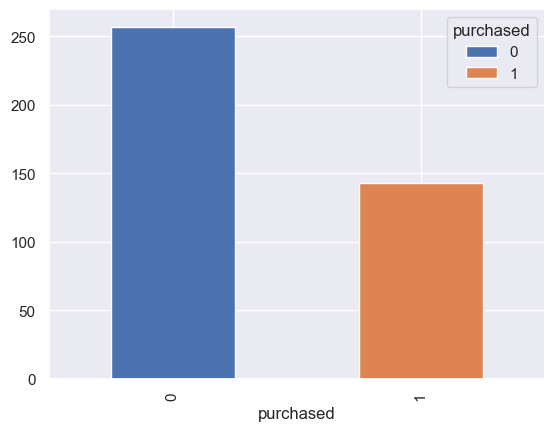

In [30]:
# check the data proportion 
pd.crosstab(df['purchased'], df['purchased']).plot(kind='bar', stacked=True)
plt.show()

In [31]:
pd.crosstab(df['purchased'], df['purchased'], normalize=True)*100

purchased,0,1
purchased,,
0,64.25,0.00
1,0.00,35.75


In [32]:
# drop the user Id 
df.drop(columns=['user_id'], inplace=True)

In [33]:
df

,gender,age,estimatedsalary,purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
# Convert the dummy data using the get_dummy 
df = pd.get_dummies(df, dtype='int64', drop_first=True)

In [35]:
df

,age,estimatedsalary,purchased,gender_Female,gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1
